In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
#Cleaning the Dataset
df_orig = pd.read_excel('D:/technocolabs//default_of_credit_card_clients.xls')

In [3]:
df_zero_mask = df_orig == 0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [4]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)
# 315

315

#### Remove all the rows with all zero features and response, confirm this that gets rid of the duplicate IDs.

In [5]:
df_clean = df_orig.loc[~feature_zero_mask,:].copy()
df_clean

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
df_clean.shape

(29685, 25)

In [7]:
df_clean['ID'].nunique()

29685

#### Clean up the EDUCATION and MARRIAGE features as in Chapter 1

In [8]:
df_clean['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: EDUCATION, dtype: int64

#### "Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

Assign unknown categories to other.

In [9]:
df_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
4      460
Name: EDUCATION, dtype: int64

##### Examine and clean marriage feature as well:

In [10]:
df_clean['MARRIAGE'].value_counts()

2    15810
1    13503
3      318
0       54
Name: MARRIAGE, dtype: int64

In [11]:
#Should only be (1 = married; 2 = single; 3 = others).
df_clean['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean['MARRIAGE'].value_counts()

2    15810
1    13503
3      372
Name: MARRIAGE, dtype: int64

##### Now instead of removing rows with PAY_1 = 'Not available', as done in Chapter 1, here select these out for addition to training and testing splits.

In [12]:
df_clean['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [13]:
missing_pay_1_mask=df_clean['PAY_1']=='Not available'

In [14]:
sum (missing_pay_1_mask)

3021

In [15]:
df_missing_pay_1 = df_clean.loc[missing_pay_1_mask,:].copy()
df_missing_pay_1.shape

(3021, 25)

In [16]:
df_missing_pay_1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [17]:
df = pd.read_csv('cleaned_data.csv')
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [18]:
features_response = df.columns.tolist()

In [19]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [20]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [22]:
df_missing_pay_1.shape

(3021, 25)

In [23]:
features_response[4]

'PAY_1'

In [24]:
np.median(X_train[:,4])

0.0

In [25]:
np.random.seed(seed=1)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,), replace=True)]

In [26]:
fill_strategy = ['mode', 'random']
fill_values[-1]

array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)

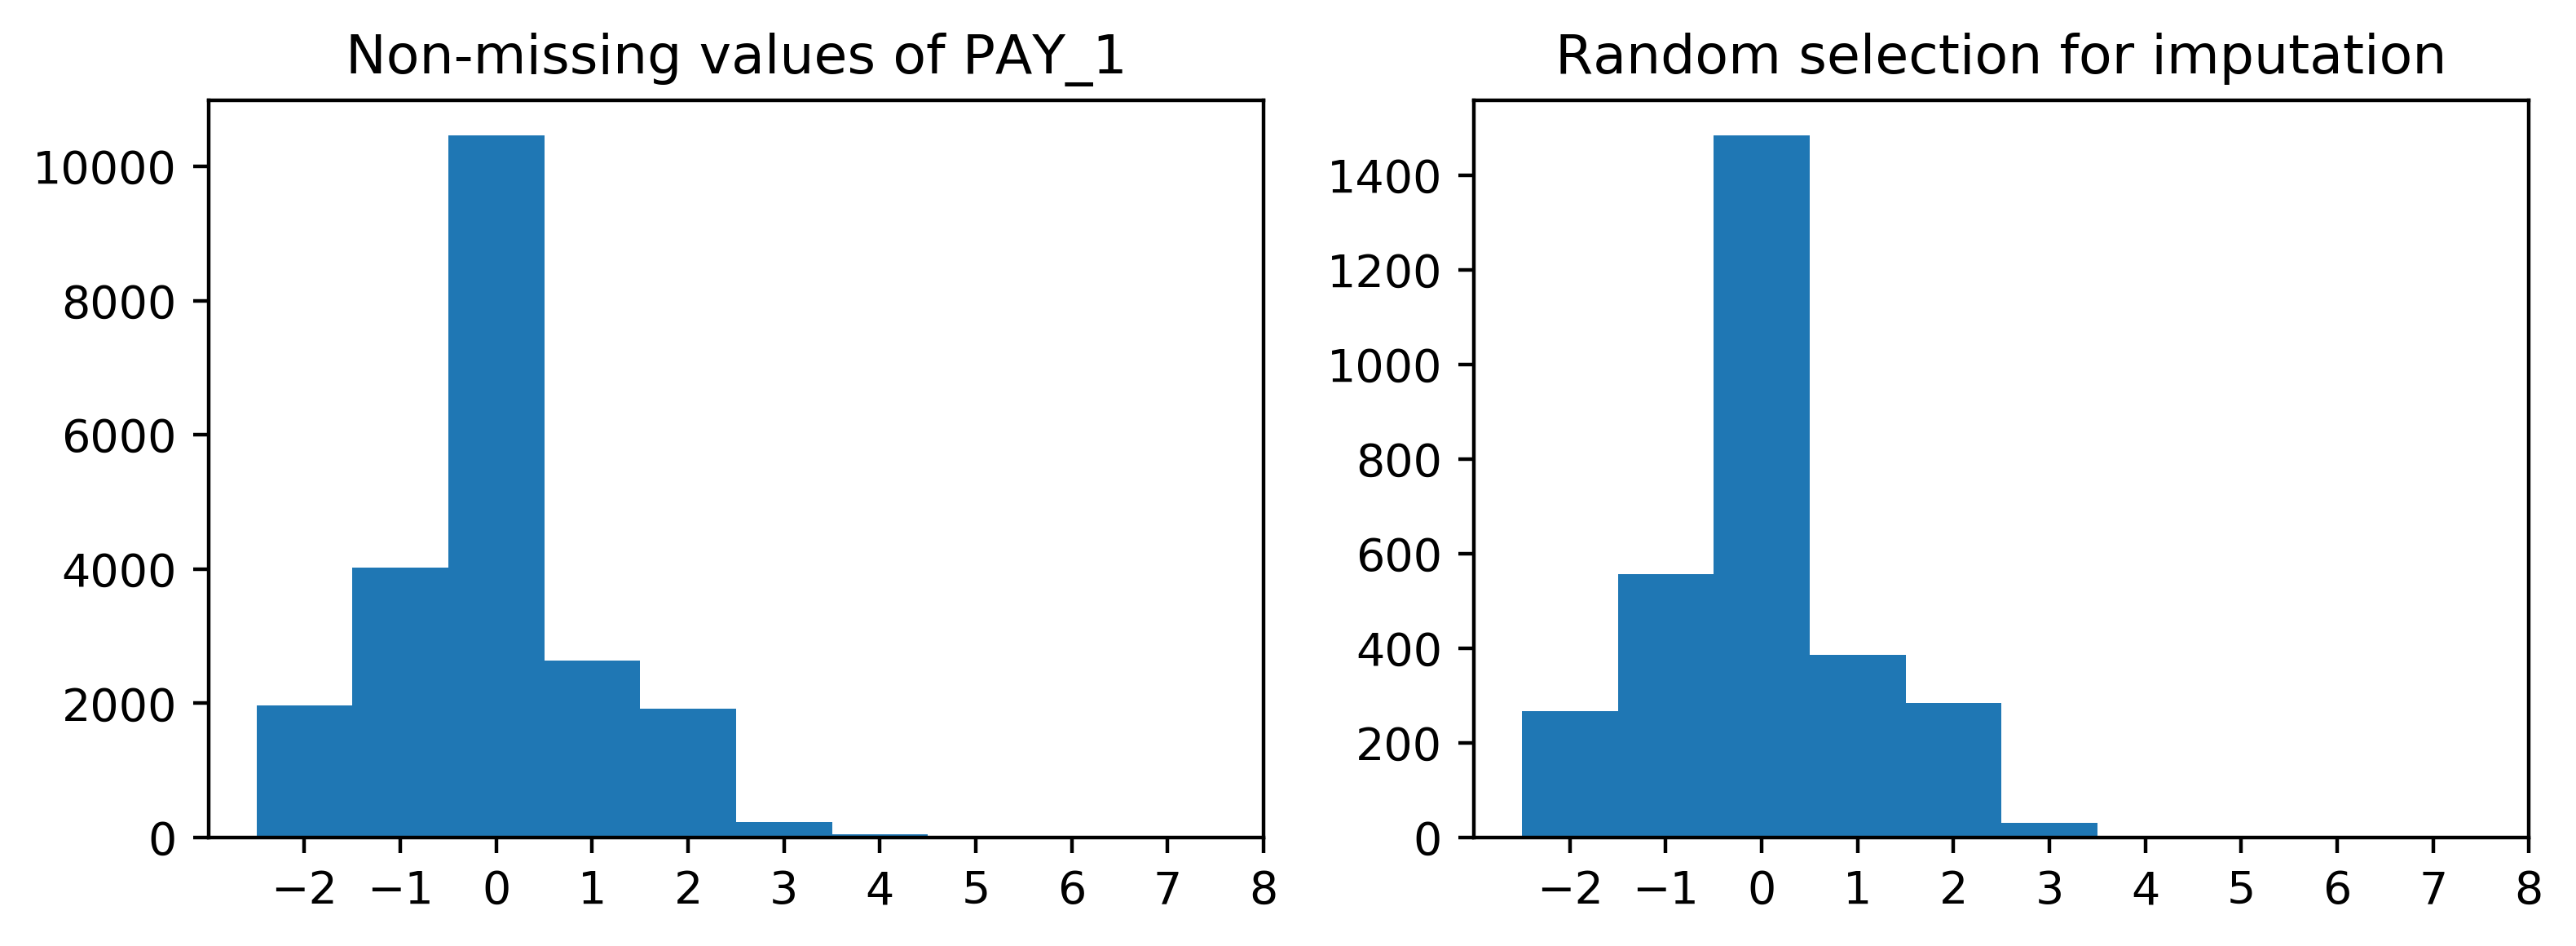

In [27]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4], bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(fill_values[-1], bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation')
plt.tight_layout()

In [28]:
from sklearn.model_selection import KFold
k_folds = KFold(n_splits=4, shuffle=True, random_state=1)
#Don't need to do a grid search, so we can use cross_validate
from sklearn.model_selection import cross_validate
#For the estimator, set the optimal hyperparameters determined in previous chapter.
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier\
(n_estimators=200, criterion='gini', max_depth=9,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=1, warm_start=False, class_weight=None)

In [30]:

for counter in range(len(fill_values)):
    #Copy the data frame with missing PAY_1 and assign imputed values
    df_fill_pay_1_filled = df_missing_pay_1.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    
    #Split imputed data in to training and testing, using the same
    #80/20 split we have used for the data with non-missing PAY_1
    X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
    train_test_split(
        df_fill_pay_1_filled[features_response[:-1]].values,
        df_fill_pay_1_filled['default payment next month'].values,
    test_size=0.2, random_state=24)
    
    #Concatenate the imputed data with the array of non-missing data
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
    
    #Use the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')
    
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


mode imputation: mean testing score 0.772866246168149, std 0.0031479941297533737
random imputation: mean testing score 0.7692540439833129, std 0.003660875187678248


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.5s finished


#### A Predictive Model for PAY_1

In [31]:
pay_1_df = df.copy()
features_for_imputation = pay_1_df.columns.tolist()
items_to_remove_2 = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university', 'default payment next month', 'PAY_1']
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove_2]
features_for_imputation

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

#### Building a Multiclass Classification Model for Imputation

In [ ]:
X_impute_train, X_impute_test, y_impute_train, y_impute_test = \
train_test_split(
    pay_1_df[features_for_imputation].values,
    pay_1_df['PAY_1'].values,
test_size=0.2, random_state=24)
rf_impute_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}
from sklearn.model_selection import GridSearchCV
#Need to use accuracy here as ROC AUC is not supported for multiclass. Need to use multiclass and not regression because need to limit to integer values of PAY_1.

cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring='accuracy',
                            n_jobs=-1, iid=False, refit=True,
                            cv=4, verbose=2, error_score=np.nan, return_train_score=True)
cv_rf_impute.fit(X_impute_train, y_impute_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   40.0s finished
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
impute_df = pd.DataFrame(cv_rf_impute.cv_results_)
impute_df

In [ ]:
cv_rf_impute.best_params_

In [ ]:
cv_rf_impute.best_score_

In [ ]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()
pay_1_value_counts

In [ ]:
pay_1_value_counts/pay_1_value_counts.sum()

In [ ]:
y_impute_predict = cv_rf_impute.predict(X_impute_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_impute_test, y_impute_predict)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()

In [ ]:
X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values
rf_impute = RandomForestClassifier(n_estimators=100, max_depth=12)
rf_impute
RandomForestClassifier(max_depth=12)
rf_impute.fit(X_impute_all, y_impute_all)

##### Using the Imputation Model and Comparing it to Other Methods

In [ ]:
df_fill_pay_1_model = df_missing_pay_1.copy()
df_fill_pay_1_model['PAY_1'].head()

In [ ]:
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)
df_fill_pay_1_model['PAY_1'].head()

In [ ]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

In [ ]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)
print(X_fill_pay_1_train.shape)
print(X_fill_pay_1_test.shape)
print(y_fill_pay_1_train.shape)
print(y_fill_pay_1_test.shape)

In [ ]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
print(X_train_all.shape)
print(y_train_all.shape)

In [ ]:

rf

In [ ]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

In [ ]:
imputation_compare_cv['test_score']

In [ ]:
np.mean(imputation_compare_cv['test_score'])

In [ ]:
np.std(imputation_compare_cv['test_score'])

In [ ]:
#Reassign values using mode imputation
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)
df_fill_pay_1_model['PAY_1'].unique()

In [ ]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [ ]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)
print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)

In [ ]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

In [ ]:
np.mean(imputation_compare_cv['test_score'])

In [ ]:
rf.fit(X_train_all, y_train_all)

In [ ]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])


In [ ]:
thresholds = np.linspace(0, 1, 101)

In [ ]:
df[features_response[:-1]].columns[5]

In [ ]:
savings_per_default = np.mean(X_test_all[:, 5])
savings_per_default

In [ ]:
cost_per_counseling = 7500
effectiveness = 0.70
n_pos_pred = np.empty_like(thresholds)
cost_of_all_counselings = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
savings_of_all_counselings = np.empty_like(thresholds)
counter = 0
for threshold in thresholds:
    pos_pred = y_test_all_predict_proba[:,1]>threshold
    n_pos_pred[counter] = sum(pos_pred)
    cost_of_all_counselings[counter] = n_pos_pred[counter] * cost_per_counseling
    true_pos = pos_pred & y_test_all.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    savings_of_all_counselings[counter] = n_true_pos[counter] * savings_per_default * effectiveness
    
    counter += 1
net_savings = savings_of_all_counselings - cost_of_all_counselings

In [ ]:
# plt.plot(thresholds, cost_of_all_counselings)
# plt.plot(thresholds, savings_of_all_counselings)

In [ ]:
mpl.rcParams['figure.dpi'] = 50
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

In [ ]:
max_savings_ix = np.argmax(net_savings)

In [ ]:
thresholds[max_savings_ix]

In [ ]:
net_savings[max_savings_ix]

##### Challenge: Deriving Financial Insights
Everything that is needed prior to this challenge has been included in the notebook above. You should run all the necessary portions of the provided code before beginning these tasks.

#### Using the testing set, calculate the cost of all defaults if there were no counseling program and output your result.

In [ ]:
sum(y_test_all)

#### Next, calculate by what percent can the cost of defaults be decreased by the counseling program and output you result.

In [ ]:
net_saving=savings_of_all_counselings - cost_of_all_counselings

In [ ]:
#Now, plot the net savings per account against the cost of counseling per account for each threshold.

plt.plot(net_savings,cost_of_all_counselings)
plt.xlabel('Cost of counselings per account')
plt.ylabel('Net savings per account')

In [ ]:
#Next, plot the fraction of accounts predicted as positive (this is called the "flag rate") at each threshold.

flag_rate = n_pos_pred/len(y_test_all)

plt.plot(thresholds,flag_rate )
plt.ylabel('Flag rate')
plt.xlabel('Threshold')

In [ ]:
#Next, plot a precision-recall curve for the testing data.

pricision = n_true_pos/n_pos_pred
recall =    n_true_pos/sum(y_test_all)

In [ ]:
plt.plot(pricision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')

#### Finally, plot precision and recall separately on the y-axis against threshold on the x-axis.

In [ ]:
#for presicion
plt.plot(thresholds,pricision, label='Precision')
#for recall
plt.plot(thresholds,recall, label='Recall')
plt.xlabel('Threshold')
plt.legend()